# HW2: Using Pandas for Stock Analysis

**Due**: Tuesday Apr 18th

### HW Logistics

- **Release**: Every week there will be a HW assignment released on *Wednesday* and due the following *Tuesday at 11:59pm*. 
Homework will be posted to the course website. 
- **Format**: We expect students to complete the homework notebooks using Google Colab (see Discussion 1), but this is not explicitly required and you may use whatever software you would like to run notebooks. 
- **Answers**: As a general guiding policy, you should always try to make it as clear as possible what your answer to each question is, and how you arrived at your answer. Generally speaking, this will mean including all code used to generate results, outputting the actual results to the notebook, and (when necessary) including written answers to support your code.
- **Submission**: Homeworks will be *submitted to Gradescope*, and we expect all students to do question matching on Gradescope upon submission.
- **Late Policy**: All students are allowed 7 total slip days for the quarter, and at most 5 can be used for a single HW assignment. There will be no late credit if you have used up all your slip days. Also, your lowest HW grade will be dropped.

#### **Copying Notebooks (important)**

As was the case for Discussion 1, if you go to save this notebook, you will be told that you need to make a copy of the notebook to your personal google drive in order to edit and run the notebook. Thus, at the beginning of each homework, you will need to **make a copy of the notebook to your personal Google Drive** by clicking File -> Save a copy in Drive.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme()

Throughout this HW, you are going to be working with stock data from the New York Stock Exchange. 

**Question 1**: The data that contains the stock prices over time can be found in the file `stock_prices.csv`. 

(a) Read the data into a pandas dataframe called `prices_df`, and print the resulting dataframe. 

In [2]:
# -------- Question 1 (a) ---------- #

prices_df = prices_df = pd.read_csv("data/stock_prices.csv")
prices_df

# ---------------------------------- #

,date,symbol,open,close,low,high,volume
0,2010-01-04,AET,32.060001,33.000000,31.870001,33.080002,5671300.0
1,2010-01-04,ATVI,11.230000,11.300000,11.150000,11.450000,9306600.0
2,2010-01-04,BBBY,39.369999,39.029999,39.000000,39.500000,2971500.0
3,2010-01-04,PNC,53.740002,53.509998,53.200001,54.099998,4890300.0
4,2010-01-05,AET,32.939999,32.529999,32.259998,33.099998,4573600.0
...,...,...,...,...,...,...,...
7043,2016-12-29,PNC,117.279999,116.099998,115.360001,117.610001,1542300.0
7044,2016-12-30,AET,124.559998,124.010002,123.169998,124.739998,1588100.0
7045,2016-12-30,ATVI,36.529999,36.110001,35.950001,36.560001,5090500.0
7046,2016-12-30,BBBY,40.950001,40.639999,40.439999,41.419998,1923800.0


(b) Answer the following questions about the dataset:
- How many rows are in the dataset? What does one row represent?
- How many columns are in the dataset? What does one column represent?
- For each column in the dataset, describe what the column most likely represents. Since you don't have documentation to refer to, we don't expect exact answers, but you should be able to roughly figure out what each column is.

The data has 7048 rows and 7 columns. Each row represents a stock's performance on a particular day. Each column represents features about the stock/day combination. The columns/features are:
- date: the date for the stock information.
- symbol: the ticker symbol for the stock.
- open: the opening price of the stock on that day.
- close: the closing price of the stock on that day.
- low: the lowest price of the stock on that day.
- high: the highest price of the stock on that day.
- volume: the amount of transactions for that stock on that day.

**Question 2**: Before looking at the price information of different stocks, it is good to know a little information about each stock.

(a) A second CSV file, `stock_info.csv`, contains some basic information about stocks in the NYSE. Read in the CSV file and store it as `stock_info_df`. Print out the resulting dataframe.

In [15]:
# -------- Question 2 (a) ---------- #

stock_info_df = pd.read_csv("data/stock_info.csv")
stock_info_df

# ---------------------------------- #

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877
...,...,...,...,...,...,...,...,...
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",NaN,1011006
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",NaN,1136869
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",NaN,109380


(b) Find how many stocks in `stock_info_df` belong to each sector. Your result should contain 1 column for the sector, and 1 column displaying the number of rows in `stock_info_df` for each sector. 


In [16]:
# -------- Question 2 (b) ---------- #

stock_info_df["GICS Sector"].value_counts()

# Also valid
# stock_info_df.groupby("GICS Sector").count()

# ---------------------------------- #

Consumer Discretionary         85
Industrials                    69
Information Technology         68
Financials                     64
Health Care                    59
Consumer Staples               37
Energy                         36
Real Estate                    29
Utilities                      28
Materials                      25
Telecommunications Services     5
Name: GICS Sector, dtype: int64

(c) You now want to use `stock_info_df` to get information about the stocks you have price information about in `prices_df`. Create a dataframe with the "sector" of each stock in `prices_df`. (Some stocks in `prices_df` may not have information in `stock_info.csv`, in which case your resulting dataframe should contain NaNs).

In [17]:
# -------- Question 2 (c) ---------- #

# One solution
prices_df.merge(
    stock_info_df, 
    how="left", 
    left_on="symbol", 
    right_on="Ticker symbol"
)[["symbol", "GICS Sector"]].drop_duplicates()

# Another solution
# prices_df[["symbol"]].drop_duplicates().merge(
#     stock_info_df, 
#     how="left", 
#     left_on="symbol", 
#     right_on="Ticker symbol"
# )[["symbol", "GICS Sector"]]

# There are likely other valid strategies

# ---------------------------------- #

,symbol,GICS Sector
0,AET,Health Care
1,ATVI,Information Technology
2,BBBY,Consumer Discretionary
3,PNC,Financials


(d) How many stocks do we not know the sector for after using `stock_info_df`?

In [18]:
# Get NaN count from above
sectors = prices_df.merge(
    stock_info_df, 
    how="left", 
    left_on="symbol", 
    right_on="Ticker symbol"
)[["symbol", "GICS Sector"]].drop_duplicates()

sectors.isnull().sum()

symbol         0
GICS Sector    0
dtype: int64

Every stock has a sector!

**Question 3**: Now let's look at the price data. 

(a) Make a visualization to look at the "open" stock price for each stock in `prices_df`. Which stock do you think looks like the most promising stock to invest in based on your visualization?

<Axes: xlabel='date', ylabel='open'>

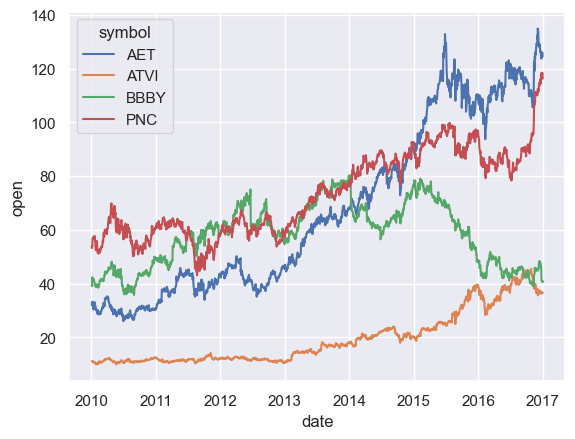

In [4]:
# -------- Question 3 (a) ---------- #

prices_df["date"] = pd.to_datetime(prices_df["date"])
sns.lineplot(data=prices_df, x="date", y="open", hue="symbol")

# ---------------------------------- #

Either PNC or AET look like the best stocks from the plot.

(b) You want to decide which stock(s) to invest in. One metric you can use to decide which stock is best is the [cumulative return](https://www.investopedia.com/terms/c/cumulativereturn.asp) (CR) of the stock, with the formula $$CR = \frac{Last Price - First Price}{First Price}.$$ Find and print the cumulative returns using the opening price of each stock in the dataset across the entire time window in the data *(Hint: you can assume for this data since it happens to be true that the data is ordered by date, i.e. the first price is the price sample for a give symbol)*.



In [22]:
# -------- Question 3 (b) ---------- #

# This works because the dates are already ordered
prices_df.groupby("symbol")["open"].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] )

# If they weren't, we could do something like this.
# def get_cr(x):
#     min_date = x["date"].min()
#     max_date = x["date"].max()
#     first_price = x.loc[x["date"] == min_date, "open"]
#     last_price = x.loc[x["date"] == max_date, "open"]

#     return (last_price.iloc[0] - first_price.iloc[0]) / first_price.iloc[0] 

# prices_df.groupby("symbol")[["open", "date"]].apply(lambda x: get_cr(x))

# ---------------------------------- #

symbol
AET     2.885215
ATVI    2.252894
BBBY    0.040132
PNC     1.162449
Name: open, dtype: float64

(c) In hindsight, what was the best day to have purchased each of the stocks in the dataset? One (perhaps flawed) way to find this is to find the day in which the opening price was lowest for each stock. Print a dataframe with the day of the lowest opening price and the corresponding opening price on that day for each stock in dataframe.

In [25]:
display(prices_df.groupby("symbol")[["open", "date"]].apply(lambda x: x.iloc[x["open"].argmin()]))

# Equivalently
# prices_df.groupby("symbol")[["open", "date"]].apply(lambda x: x[x["open"] == x["open"].min()])

,open,date
symbol,,
AET,26.059999,2010-07-02
ATVI,9.970000,2010-01-27
BBBY,35.799999,2010-08-31
PNC,43.160000,2011-08-23


(d) Find and print the date in which total combined price of the stocks was lowest, and the corresponding total combined price

In [24]:
daily_prices = prices_df.groupby("date")[["open"]].sum()
daily_prices.iloc[daily_prices["open"].argmin()]

open    123.379997
Name: 2010-08-31 00:00:00, dtype: float64